In [11]:
!wget --no-check-certificate  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pengembangan_academy/Chessman-image-dataset.zip \-O /tmp/Chessman-image-dataset.zip

--2020-09-28 02:31:46--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M  21.1MB/s    in 2.7s    

2020-09-28 02:31:49 (21.1 MB/s) - ‘/tmp/Chessman-image-dataset.zip’ saved [60684125/60684125]



In [13]:
# unzip the dataset 
import os 
import zipfile 
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref   = zipfile.ZipFile(local_zip , 'r')
zip_ref.extractall('/tmp') 
zip_ref.close()

In [16]:
# list all the folder in dataset 
os.listdir('/tmp/Chessman-image-dataset/Chess') 


['Bishop', 'Rook', 'King', 'Knight', 'Queen', 'Pawn']

In [17]:
print('total pawn images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('total King images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('total Knight images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))

total pawn images : 107
total King images : 76
total Knight images : 106


In [19]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

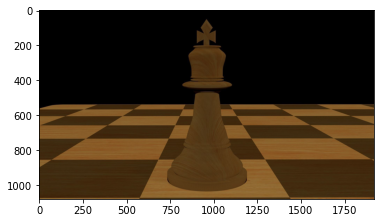

In [20]:
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
 
train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.1) # set validation split

In [23]:
# split into training and testing 
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [24]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(6, activation='softmax')  
])

In [25]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [26]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=2)

Epoch 1/50
63/63 - 30s - loss: 1.8278 - accuracy: 0.1924 - val_loss: 1.7873 - val_accuracy: 0.1731
Epoch 2/50
63/63 - 29s - loss: 1.7867 - accuracy: 0.1764 - val_loss: 1.7861 - val_accuracy: 0.1923
Epoch 3/50
63/63 - 29s - loss: 1.7854 - accuracy: 0.1764 - val_loss: 1.7794 - val_accuracy: 0.1731
Epoch 4/50
63/63 - 29s - loss: 1.7814 - accuracy: 0.2164 - val_loss: 1.7507 - val_accuracy: 0.2885
Epoch 5/50
63/63 - 29s - loss: 1.7378 - accuracy: 0.2545 - val_loss: 1.7575 - val_accuracy: 0.2500
Epoch 6/50
63/63 - 29s - loss: 1.7013 - accuracy: 0.2645 - val_loss: 1.7189 - val_accuracy: 0.2692
Epoch 7/50
63/63 - 29s - loss: 1.6129 - accuracy: 0.3026 - val_loss: 1.7042 - val_accuracy: 0.2500
Epoch 8/50
63/63 - 29s - loss: 1.6140 - accuracy: 0.2886 - val_loss: 1.7320 - val_accuracy: 0.2308
Epoch 9/50
63/63 - 29s - loss: 1.5605 - accuracy: 0.3647 - val_loss: 1.6606 - val_accuracy: 0.2885
Epoch 10/50
63/63 - 29s - loss: 1.4942 - accuracy: 0.4128 - val_loss: 1.6325 - val_accuracy: 0.2885
Epoch 11/

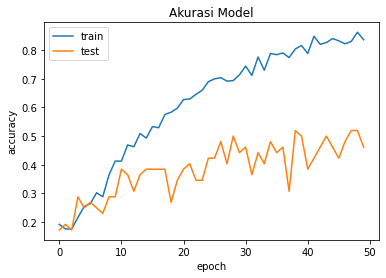

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

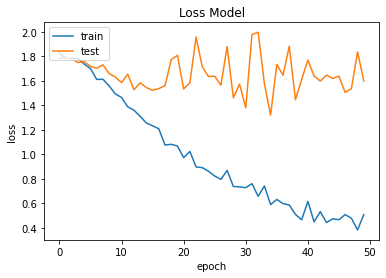

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()